<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration-des-données" data-toc-modified-id="Exploration-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration des données</a></span></li><li><span><a href="#Imputation-des-valeurs-manquantes-de-margin_low" data-toc-modified-id="Imputation-des-valeurs-manquantes-de-margin_low-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imputation des valeurs manquantes de <code>margin_low</code></a></span><ul class="toc-item"><li><span><a href="#Corrélation-entre-les-variables-explicatives-(colinéarité)" data-toc-modified-id="Corrélation-entre-les-variables-explicatives-(colinéarité)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Corrélation entre les variables explicatives (colinéarité)</a></span></li><li><span><a href="#Linéarité-entre-la-variable-de-réponse-et-les-variables-explicatives" data-toc-modified-id="Linéarité-entre-la-variable-de-réponse-et-les-variables-explicatives-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linéarité entre la variable de réponse et les variables explicatives</a></span></li><li><span><a href="#Régressions-linéaires" data-toc-modified-id="Régressions-linéaires-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Régressions linéaires</a></span><ul class="toc-item"><li><span><a href="#Modèle-de-régression-linéaire-simple" data-toc-modified-id="Modèle-de-régression-linéaire-simple-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Modèle de régression linéaire simple</a></span><ul class="toc-item"><li><span><a href="#Entrainement-du-modèle" data-toc-modified-id="Entrainement-du-modèle-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Entrainement du modèle</a></span></li><li><span><a href="#Analyse-du-modèle" data-toc-modified-id="Analyse-du-modèle-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Analyse du modèle</a></span></li></ul></li><li><span><a href="#Modèle-de-régression-linéaire-simple-avec-erreur-type-robuste-à-l'hétéroscédasticité" data-toc-modified-id="Modèle-de-régression-linéaire-simple-avec-erreur-type-robuste-à-l'hétéroscédasticité-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Modèle de régression linéaire simple avec erreur type robuste à l'hétéroscédasticité</a></span></li><li><span><a href="#Modèle-de-régression-pondérée" data-toc-modified-id="Modèle-de-régression-pondérée-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Modèle de régression pondérée</a></span></li><li><span><a href="#Modèle-parcimonieux" data-toc-modified-id="Modèle-parcimonieux-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Modèle parcimonieux</a></span></li><li><span><a href="#Modèle-avec-interaction" data-toc-modified-id="Modèle-avec-interaction-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Modèle avec interaction</a></span></li></ul></li><li><span><a href="#Evaluation-des-modèles" data-toc-modified-id="Evaluation-des-modèles-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Evaluation des modèles</a></span></li></ul></li><li><span><a href="#Imputation-des-données" data-toc-modified-id="Imputation-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imputation des données</a></span></li><li><span><a href="#Test-KNN" data-toc-modified-id="Test-KNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test KNN</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from scripts.P10_functions import *

%matplotlib inline

In [2]:
# on change le thème visuel des graphiques
sns.set_theme(style='whitegrid', palette='muted')

# on remplace certains paramètres des figures par les anciens paramètres par
# défaut d'avant la mise à jour
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

In [3]:
billets_raw = pd.read_csv('./data/billets.csv', sep=';')
billets = billets_raw.copy()

# Exploration des données

In [4]:
billets.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


In [5]:
print(f"Le dataset est composé de {billets.shape[0]} observations et",
      f"{billets.shape[1]} variables.")

Le dataset est composé de 1500 observations et 7 variables.


In [6]:
# nombre de vrais et faux billets
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [7]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [8]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Plusieurs valeurs sont manquantes pour la variable `margin_low`.

In [9]:
# nature des billets dont la valeur de "margin_low" est manquante
billets.loc[billets['margin_low'].isna(), 'is_genuine'].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

Pour chacune des variables quantitatives, on représente les données sous forme de *boxplots*.

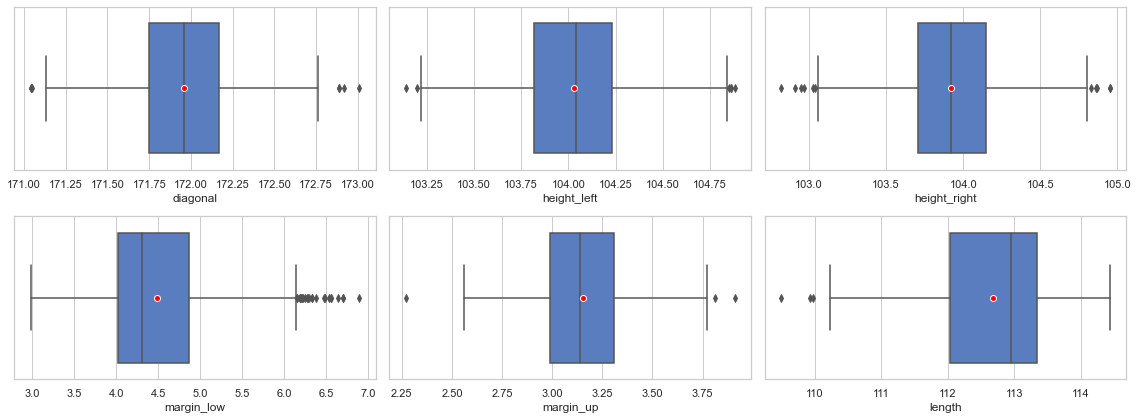

In [10]:
numerical_features = billets.select_dtypes('number').columns
n_features = numerical_features.size

ncols = 3
nrows = ceil(n_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 3))

n_empty_axes = axes.size - n_features

if n_empty_axes:    # permet d'éviter la suppression de tous les axes si n_empty_axes = 0
    for ax in axes.flat[-n_empty_axes:]:
        ax.remove()
        
meanprops = {
    'marker': 'o',
    'markerfacecolor': 'red',
    'markeredgecolor': 'white'
}
    
for feature, ax in zip(numerical_features, axes.flat):
    sns.boxplot(
        data=billets, x=feature,
        showmeans=True, meanprops=meanprops,
        ax=ax
    )
    
fig.tight_layout()

On observe la présence de plusieurs outliers pour chacune des variables, en particulier pour `margin_low`. On se demande si celle-ci subsiste lorsque l'on étudie les vrais et les faux billets séparément.

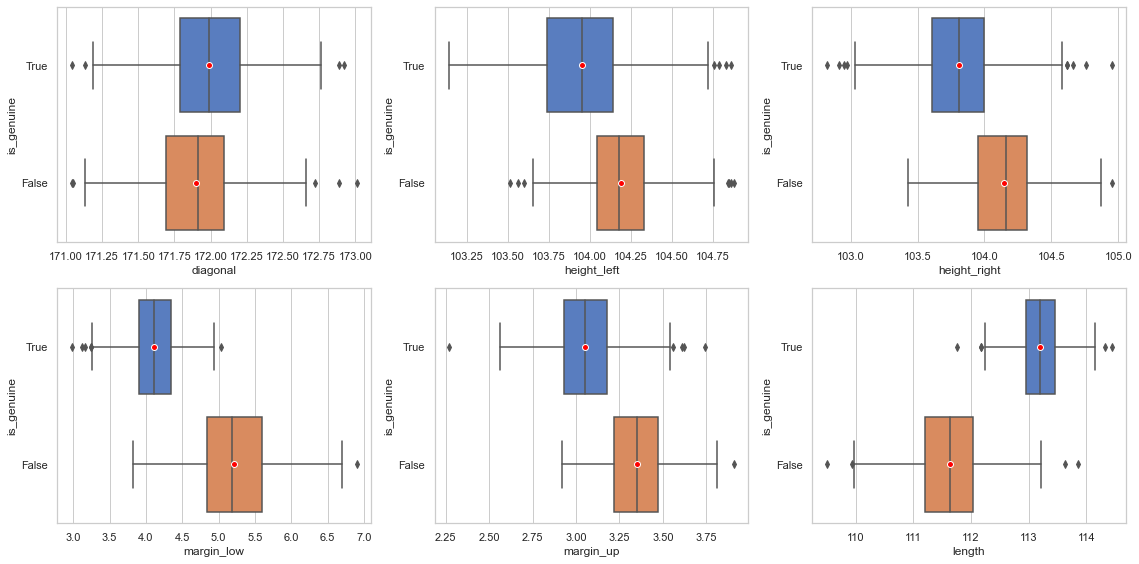

In [11]:
numerical_features = billets.select_dtypes('number').columns
n_features = numerical_features.size

ncols = 3
nrows = ceil(n_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))

n_empty_axes = axes.size - n_features

if n_empty_axes:
    for ax in axes.flat[-n_empty_axes:]:
        ax.remove()
    
for feature, ax in zip(numerical_features, axes.flat):
    sns.boxplot(
        x=billets[feature], y=billets['is_genuine'].astype(str),
        showmeans=True, meanprops=meanprops,
        ax=ax
    )
    
fig.tight_layout()

Les distributions des variables `margin_low`, `margin_up` et `length` sont assez différentes entre les vrais et les  faux billets. En effet, les marges des vrais billets sont généralement plus petites que celles des faux billets et, à l'inverse, la longueur des vrais billets est plus grande que celle des faux billets.

On observe encore des outliers, mais on choisit de les conserver étant donné qu'ils ne sont pas très éloignés du reste des observations.

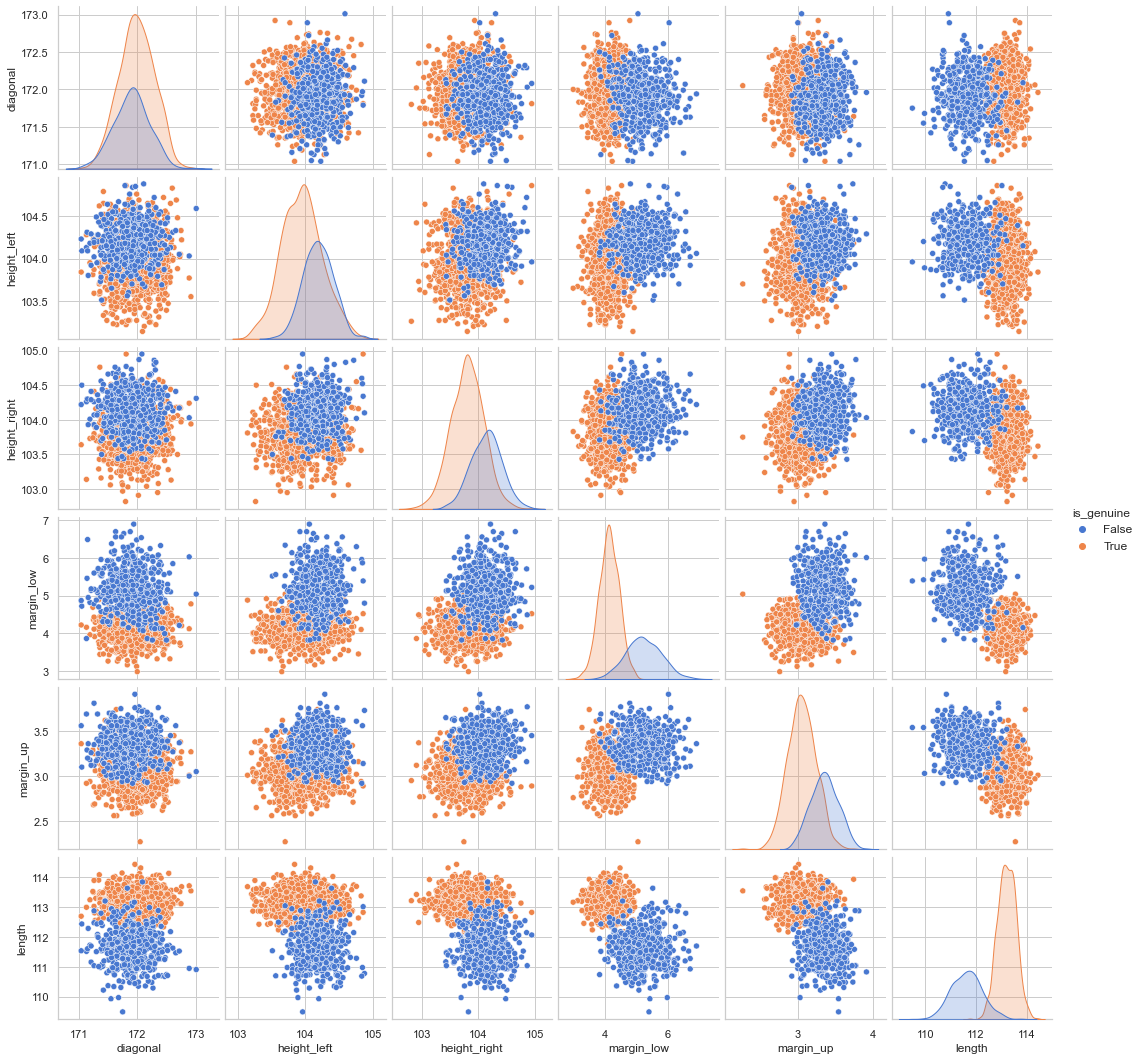

In [12]:
sns.pairplot(billets, hue='is_genuine')

plt.show()

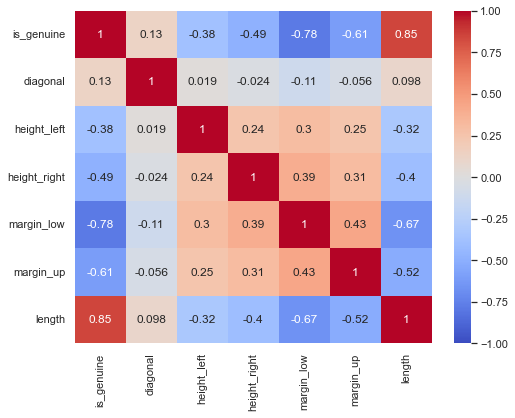

In [13]:
# corrélation entre les variables
sns.heatmap(billets.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

# Imputation des valeurs manquantes de `margin_low`

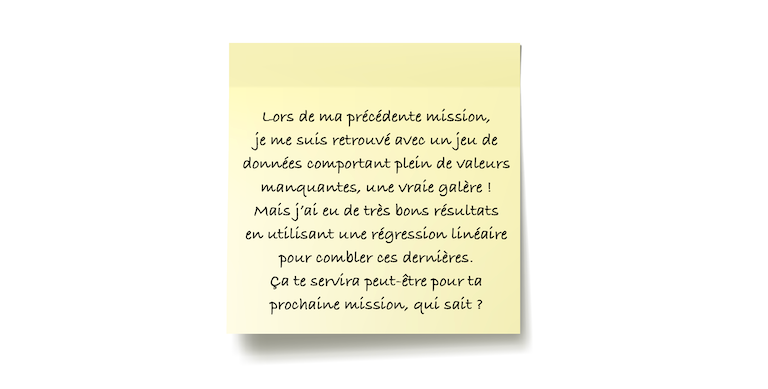

On cherche à réaliser une régression linéaire pour imputer les valeurs manquantes de `margin_low`.

L'objectif ici n'est pas de créer un modèle que l'on pourra réutiliser pour imputer de futurs jeux de données, mais uniquement pour imputer le jeu de données présent, afin de disposer de plus de données pour entrainer l'algorithme de prédiction et ainsi augmenter potentiellement ses performances. On peut donc utiliser toutes les variables, y compris `is_genuine`.

Créer un modèle pour imputer de futurs datasets non étiquettés (sans la variable `is_genuine`) ne nous semble pas être une bonne idée. En effet, la variable `margin_low` est très corrélée avec `is_genuine`. Ainsi, les prédictions de `margin_low` du modèle de régression linéaire vont fortement dépendre de la composition en vrais/faux billets du *training set*, ce qui risque *in fine* de biaiser les résultats du modèle de prédiction de faux billets.

In [14]:
billets['is_genuine'] = billets['is_genuine'].astype(int)

On commence par diviser les données en un *training set* et un *test set*.

In [15]:
train_set_imputation, test_set_imputation = train_test_split(billets.dropna(subset='margin_low'),
                                                             test_size=0.2,
                                                             random_state=42)

Pour réaliser une régression linéaire, les données doivent satisfaire plusieurs conditions :
- la relation entre les variables explicatives et la variable expliquée doit être linéaire
- les observations doivent être indépendantes
- les résidus doivent suivre une loi normale et être homogènes (homoscédasticité)
- il ne doit pas exister de multicollinéarité (forte corrélation linéaire) entre les variables explicatives
---
Source : https://delladata.fr/regression-lineaire-multiple/

## Corrélation entre les variables explicatives (colinéarité)

Pour évaluer la colinéarité, on étudie la corrélation de Pearson entre les variables deux à deux à l'aide d'une matrice de corrélation.

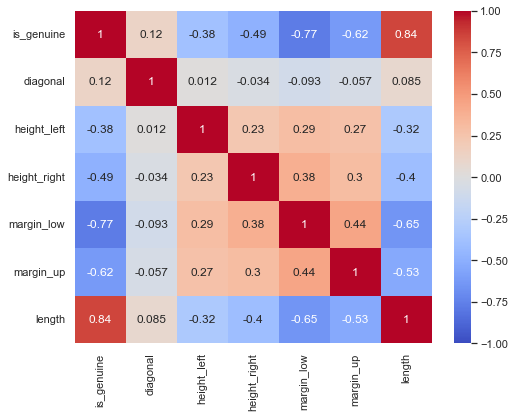

In [16]:
sns.heatmap(train_set_imputation.corr(),
            vmin=-1, vmax=1, annot=True,
            cmap='coolwarm')
plt.show()

Les variables `is_genuine` et `length` sont très corrélées (coefficient de Pearson de 0,85). L'information qu'elles apportent est donc rendondante. Généralement, on préfèrera supprimer l'une des deux variables pour réduire la complexité du modèle et ainsi le risque de sur-apprentissage. Cependant, nous allons pour l'instant conserver l'ensemble des variables, ce qui nous permettra d'étudier l'effet des méthodes de sélection de variables. Nous calculerons également les VIF (variance inflation factors) pour nous assurer de l'absence de multicolinéarités.

## Linéarité entre la variable de réponse et les variables explicatives

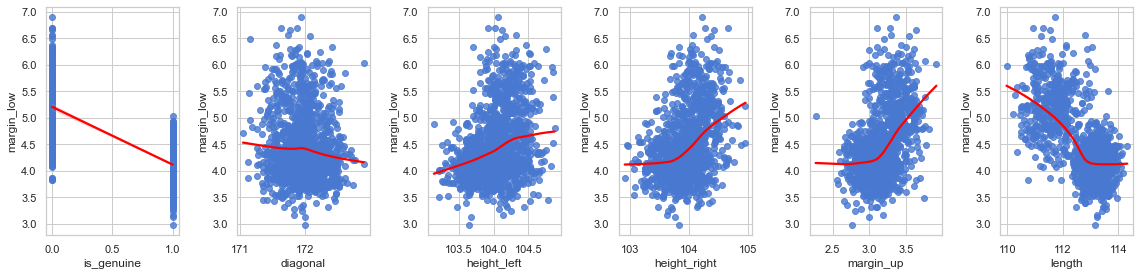

In [17]:
features = train_set_imputation.columns.drop('margin_low')

fig, axes = plt.subplots(ncols=features.size, figsize=(16, 4))

for feature, ax in zip(features, axes):
    lowess = False if feature == 'is_genuine' else True
    
    sns.regplot(
        data=train_set_imputation, x=feature, y='margin_low',
        lowess=lowess, line_kws=dict(color='red'),
        ax=ax
    )
    
fig.tight_layout()

A première vue, il pourrait exister une relation linéaire entre `margin_low` et les autres variables. Cependant, en examinant les données de plus près, cette relation semble surtout être due à la présence de deux groupes de points qui correspondent aux vrais et aux faux billets.

Pour vérifier cela, on représente `margin_low` en fonction des autres variables pour les vrais et les faux billets séparément.

In [18]:
mask = train_set_imputation['is_genuine'] == 1
cols = train_set_imputation.columns.drop('is_genuine')

train_set_genuine = train_set_imputation.loc[mask, cols]
train_set_counterfeit = train_set_imputation.loc[~mask, cols]

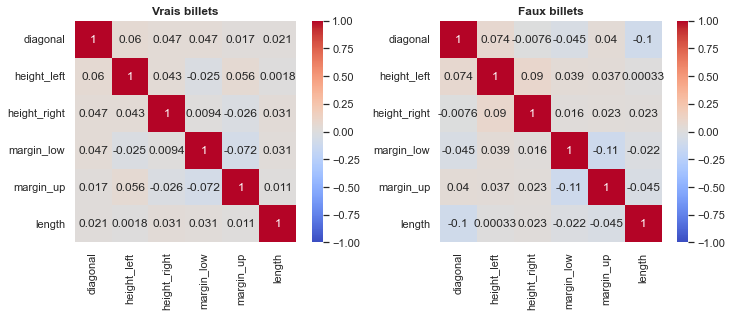

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(train_set_genuine.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax1)
sns.heatmap(train_set_counterfeit.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax=ax2)

ax1.set_title('Vrais billets', weight='bold')
ax2.set_title('Faux billets', weight='bold')

plt.show()

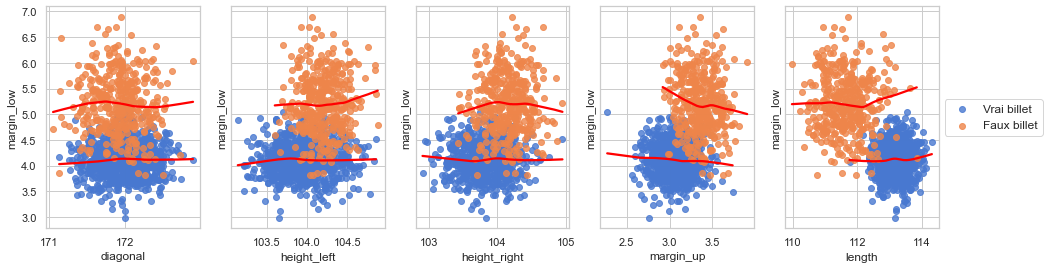

In [20]:
features = train_set_genuine.columns.drop('margin_low')

data_dict = {
    'Vrai billet': train_set_genuine,
    'Faux billet': train_set_counterfeit
}

fig, axes = plt.subplots(nrows=1, ncols=features.size, sharey=True, figsize=(16, 4))

for label, dataset in data_dict.items():
    for feature, ax in zip(features, axes):
        sns.regplot(
            x=feature, y='margin_low', data=dataset,
            lowess=True, label=label, line_kws=dict(color='red'), ax=ax
        )
        
axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<div class="alert alert-block alert-info">
    <b>Note</b><br>
    Il ne semble pas y avoir de forte relation linéaire entre <code>margin_low</code> et les autres variables lorsque l'on analyse les vrais et les faux billets séparément. Une régression linéaire simple avec la variable <code>is_genuine</code> pourrait être aussi performante qu'une régression linéaire multiple. Néanmoins, dans une démarche d'apprentissage, nous allons tester différents modèles.
</div>

## Régressions linéaires

Nous allons entrainer plusieurs modèles de régression linéaire sur le *training set* et comparer leurs performances sur le *test set*.

### Modèle de régression linéaire simple

#### Entrainement du modèle

In [21]:
slr = smf.ols('margin_low ~ is_genuine', data=train_set_imputation).fit()

In [22]:
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1751.
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.40e-234
Time:                        15:55:55   Log-Likelihood:                -650.69
No. Observations:                1170   AIC:                             1305.
Df Residuals:                    1168   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2072      0.021    245.349      0.0

In [23]:
print(f"Le coefficient de détermination est de {slr.rsquared:.2g}.",
      f"Cela signifie que le modèle explique {slr.rsquared * 100:.2g} % de la variabilité des données.")

Le coefficient de détermination est de 0.6. Cela signifie que le modèle explique 60 % de la variabilité des données.


#### Analyse du modèle

Comme mentionné ci-dessus, l'une des hypothèses de validité de la régression linéaire est que les résidus suivent une loi normale et soient homogènes.

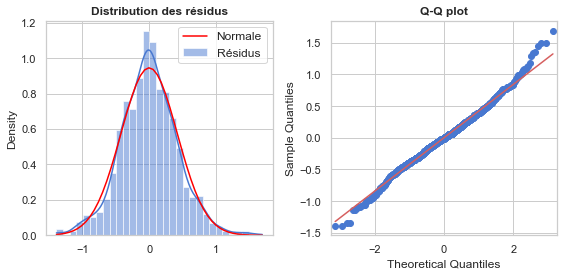

In [24]:
check_normality_of_residuals(slr)

plt.tight_layout()

Les résidus semblent normalement distribués.

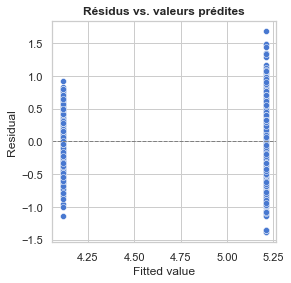

In [25]:
plot_residuals_vs_fitted(slr)

Nous observons une <b>hétéroscédasticité des résidus</b> : la variance des résidus est plus élevée chez les faux billets que chez les vrais billets. L'hétéroscédasticité ne biaise pas les estimations des coefficients, mais rend celles-ci moins précises ; c'est-à-dire qu'il y a plus de chances que ces estimations soient éloignées du coefficient réel de la population. L'erreur type (*standard error*) des coefficients étant sous-estimée, on ne peut pas se fier aux mesures qui sont calculées à partir de celles-ci comme la p-value, l'intervalle de confiance ou encore la statistique F.

Il existe plusieurs méthodes pour résoudre ce problème :
- Redéfinir les variables explicatives
- Transformer la variable expliquée
- Réaliser une régression pondérée (*weighted regression*)
- Remplacer l'erreur standard par une erreur standard robuste à l'hétéroscédasticité

Nous allons utiliser les deux dernières méthodes et comparer les résultats.

---
Sources :
- https://statisticsbyjim.com/regression/heteroscedasticity-regression/
- https://online.stat.psu.edu/stat501/
- https://medium.com/datamotus/solving-the-problem-of-heteroscedasticity-through-weighted-regression-e4a22f1afa6b

### Modèle de régression linéaire simple avec erreur type robuste à l'hétéroscédasticité

In [26]:
slr_robust = smf.ols('margin_low ~ is_genuine', data=train_set_imputation).fit(cov_type='HC3')
print(slr_robust.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1242.
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.96e-186
Time:                        15:55:56   Log-Likelihood:                -650.69
No. Observations:                1170   AIC:                             1305.
Df Residuals:                    1168   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2072      0.029    181.047      0.0

Comme attendu, l'erreur type des paramètres a augmenté, mais on peut désormais se fier aux différentes mesures calculées à partir de celle-ci. A noter que les paramètres sont toujours significativement différent de zéro (au seuil de 5 %).

Cependant, la performance de ce type de modèles n'est généralement pas optimale dans le sens où il est possible de trouver d'autres coefficients avec une variance plus faible. Pour ce faire, on peut réaliser une <b>régression linéaire pondérée</b>. 

Le principe de cette méthode consiste à discriminer les observations en fonction de leur "qualité" (en fonction de leur variance). En attribuant un poids plus faible aux observations de moindre qualité (avec une variance élevée), nous sommes susceptible d'obtenir une meilleure adéquation (*a better fit*) du modèle aux données.

En l'occurrence, on observe que la non-constance de la variance est liée à la nature du billet. On va donc affecter à chaque observation un poids qui correspond à l'inverse de la variance du groupe (vrais ou faux billets) auquel il appartient.

Cela ne devrait pas changer la valeur des coefficients puisque nous disposons ici de seulement deux valeurs de x pour tracer la droite de régression. En revanche, les différentes variances des groupes seront prises en compte dans le calcul des résidus studentisés, ce qui nous permettra de détecter les outliers (les valeurs atypiques de y, ici de `margin_low`) de manière plus fiable.

Cette démarche est basée sur l'exemple 2 de ce cours :<br>
https://online.stat.psu.edu/stat501/lesson/13/13.1/13.1.1

### Modèle de régression pondérée

Comme mentionné ci-dessus, on attribue à chaque observation un poids égal à l'inverse de la variance de son groupe (vrais ou faux billets).

On commence par calculer la variance des résidus pour les vrais et les faux billets, respectivement.

In [27]:
resid_df = train_set_imputation[['is_genuine']].copy()
resid_df['resid'] = slr.resid

In [28]:
resid_vars = resid_df.groupby('is_genuine')['resid'].var()
resid_vars

is_genuine
0    0.326752
1    0.102553
Name: resid, dtype: float64

In [29]:
weight_mapper = {group: (1 / var) for group, var in resid_vars.items()}
weight_mapper

{0: 3.0604204714855343, 1: 9.751049164074663}

On attribue les poids à chaque observation en fonction de son groupe.

In [30]:
weights = train_set_imputation['is_genuine'].map(weight_mapper)

On entraine le modèle.

In [31]:
slr_weighted = smf.wls('margin_low ~ is_genuine', data=train_set_imputation, weights=weights).fit()

In [32]:
print(slr_weighted.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.516
Model:                            WLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1245.
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.93e-186
Time:                        15:55:56   Log-Likelihood:                -556.34
No. Observations:                1170   AIC:                             1117.
Df Residuals:                    1168   BIC:                             1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2072      0.029    181.276      0.0

De manière intéressante, les erreurs types sont les mêmes que les erreurs robustes calculées précédemment. La valeur des coefficients est restée la même (comme attendu).

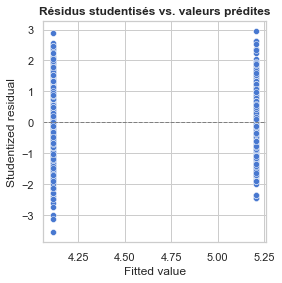

In [33]:
plot_studentized_resids_vs_fitted_wls(slr_weighted)

On observe maintenant une homoscédasticité des résidus.

On cherche à identifier les observations atypiques (qui ont des valeurs de x ou y atypiques) et influentes (qui influencent la régression de manière exagérée).

In [34]:
df = get_unusual_and_influencial_obs_wls(slr_weighted, train_set_imputation)

In [35]:
df.loc[df['is_unusual_and_influencial'] == True]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,fitted,has_unusual_x_values,studentized_resids,has_unusual_y_value,is_influencial_dffits,is_influencial_cooks_d,is_unusual_and_influencial
897,1,172.00,103.65,103.83,2.98,2.76,113.17,4.115194,False,-3.547124,True,True,True,True
788,1,171.99,103.67,103.76,3.12,2.99,113.22,4.115194,False,-3.109668,True,True,True,True


Le terme d'outlier désigne *stricto sensus* uniquement les valeurs atypiques de y<sup>[1]</sup>. Dans la suite de ce notebook, nous allons par commodité utiliser ce terme pour désigner plus généralement les valeurs atypiques (de x ou y) et influentes.<br>
On réentraine le modèle sans ces outliers.

---
Source :<br>
[1] https://online.stat.psu.edu/stat501/lesson/11/11.1

In [36]:
not_outliers = df.index[df['is_unusual_and_influencial'] == 0]

In [37]:
train_set_no_outliers = train_set_imputation.loc[not_outliers]

In [38]:
weights = train_set_no_outliers['is_genuine'].map(weight_mapper)

In [39]:
slr_weighted_no_outliers = smf.wls('margin_low ~ is_genuine', data=train_set_no_outliers, weights=weights).fit()

In [40]:
print(slr_weighted_no_outliers.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.519
Model:                            WLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1260.
Date:                Tue, 09 May 2023   Prob (F-statistic):          9.25e-188
Time:                        15:55:57   Log-Likelihood:                -545.53
No. Observations:                1168   AIC:                             1095.
Df Residuals:                    1166   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2072      0.028    182.873      0.0

La présence ou non des outliers ne semble pas beaucoup affecter le modèle.

### Modèle parcimonieux

Nous allons utiliser une stratégie descendante de sélection des variables basée sur la p-value des coefficients pour obtenir un modèle parcimonieux. Autrement dit, nous allons partir d'un modèle qui contient toutes les variables et éliminer itérativement les variables non significatives (dont la p-value est supérieure à 0,05).

In [41]:
weights = train_set_imputation['is_genuine'].map(weight_mapper)

In [42]:
mlr_weighted_sparse = wls_formula_backward_selection(
    data=train_set_imputation,
    endog_name='margin_low',
    weights=weights
)

La variable explicative 'height_right' a été retirée du modèle (p-value : 0.79).
Variables restantes : ['is_genuine', 'diagonal', 'height_left', 'margin_up', 'length']

La variable explicative 'height_left' a été retirée du modèle (p-value : 0.72).
Variables restantes : ['is_genuine', 'diagonal', 'margin_up', 'length']

La variable explicative 'length' a été retirée du modèle (p-value : 0.65).
Variables restantes : ['is_genuine', 'diagonal', 'margin_up']

La variable explicative 'diagonal' a été retirée du modèle (p-value : 0.35).
Variables restantes : ['is_genuine', 'margin_up']


In [43]:
print(mlr_weighted_sparse.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.519
Model:                            WLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     629.5
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.50e-186
Time:                        15:55:57   Log-Likelihood:                -552.72
No. Observations:                1170   AIC:                             1111.
Df Residuals:                    1167   BIC:                             1127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7323      0.197     29.067      0.0

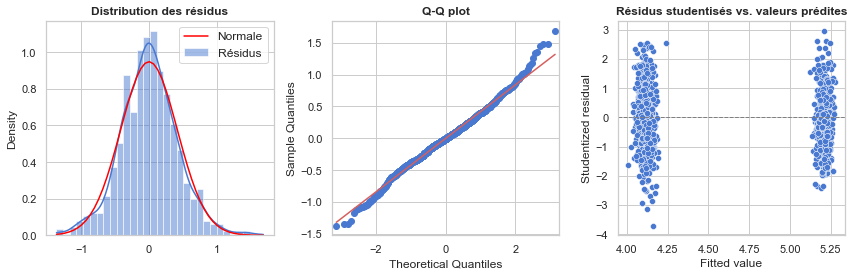

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
check_normality_of_residuals(mlr_weighted_sparse, axes=axes[:2])
plot_studentized_resids_vs_fitted_wls(mlr_weighted_sparse, ax=axes[2])
fig.tight_layout()

On vérifie l'absence de colinéarité en calculant les VIF.

In [45]:
 check_collinearity(mlr_weighted_sparse)

Variance inflation factor (VIF)
-------------------------------
is_genuine : 1.6
margin_up : 1.6

Tous les VIF sont inférieurs à 5, il n'y pas donc pas de problème de colinéarité.


In [46]:
df = get_unusual_and_influencial_obs_wls(mlr_weighted_sparse, data=train_set_imputation)

In [47]:
outliers = df.loc[df['is_unusual_and_influencial'] == True]
outliers.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,fitted,has_unusual_x_values,studentized_resids,has_unusual_y_value,is_influencial_dffits,is_influencial_cooks_d,is_unusual_and_influencial
260,1,172.27,103.71,103.64,4.64,2.67,113.63,4.174463,True,1.462024,False,False,True,True
791,1,171.82,103.67,103.80,4.60,3.49,113.32,4.046274,True,1.740447,False,True,True,True
48,1,172.07,104.05,103.82,3.71,3.61,113.05,4.027515,True,-1.000006,False,False,True,True


In [48]:
outliers.shape[0]

17

On représente la droite de régression ainsi que les outliers.

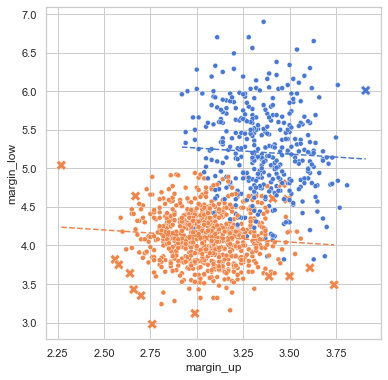

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    data=df, x='margin_up', y='margin_low',
    hue='is_genuine',
    size='is_unusual_and_influencial', sizes=[25, 100],
    style='is_unusual_and_influencial', markers=['o', 'X'],
    ax=ax
)

# on utilise uniquement les points extrêmes de chacun des deux groupes pour
# tracer les droites de régression
# cela permet un affichage 40 fois plus rapide de la figure
extremum_indexes = df.groupby('is_genuine')['margin_up'].agg(
    ['idxmin','idxmax']
).to_numpy().flatten()

extrema = df.loc[extremum_indexes]

sns.lineplot(
    data=extrema, x='margin_up', y='fitted',
    hue='is_genuine',
    linestyle='--',
    ax=ax
)

ax.get_legend().remove()
plt.show()

On réentraine le modèle sans ces outliers.

In [50]:
not_outliers = df.index[df['is_unusual_and_influencial'] == 0]

In [51]:
train_set_no_outliers = train_set_imputation.loc[not_outliers]

In [52]:
weights = train_set_no_outliers['is_genuine'].map(weight_mapper)

In [53]:
mlr_weighted_sparse_no_outliers = smf.wls(
    'margin_low ~ is_genuine + margin_up',
    data=train_set_no_outliers,
    weights=weights
).fit()

In [54]:
print(mlr_weighted_sparse_no_outliers.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.531
Model:                            WLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     650.7
Date:                Tue, 09 May 2023   Prob (F-statistic):          9.94e-190
Time:                        15:55:59   Log-Likelihood:                -519.11
No. Observations:                1153   AIC:                             1044.
Df Residuals:                    1150   BIC:                             1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8299      0.204     28.567      0.0

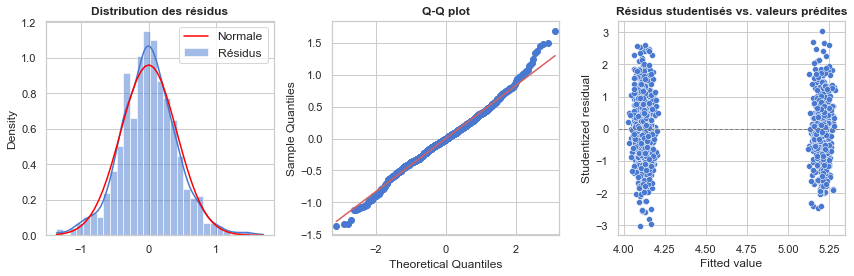

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
check_normality_of_residuals(mlr_weighted_sparse_no_outliers, axes=axes[:2])
plot_studentized_resids_vs_fitted_wls(mlr_weighted_sparse_no_outliers, ax=axes[2])
fig.tight_layout()

### Modèle avec interaction

In [56]:
weights = train_set_imputation['is_genuine'].map(weight_mapper)

In [57]:
mlr_weighted_interaction = smf.wls(
    'margin_low ~ is_genuine * margin_up',
    data=train_set_imputation,
    weights=weights
).fit()

In [58]:
print(mlr_weighted_interaction.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.520
Model:                            WLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     420.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.01e-185
Time:                        15:55:59   Log-Likelihood:                -551.81
No. Observations:                1170   AIC:                             1112.
Df Residuals:                    1166   BIC:                             1132.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3920 

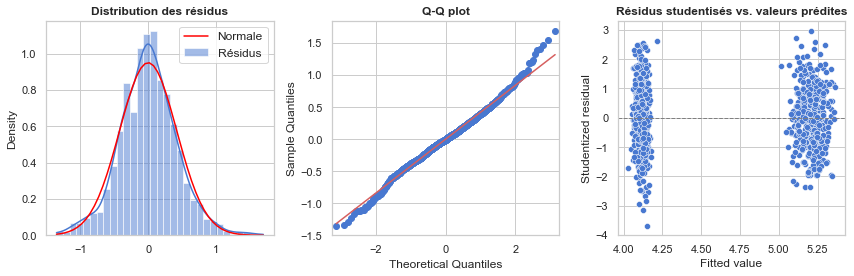

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
check_normality_of_residuals(mlr_weighted_interaction, axes=axes[:2])
plot_studentized_resids_vs_fitted_wls(mlr_weighted_interaction, ax=axes[2])
fig.tight_layout()

In [60]:
df = get_unusual_and_influencial_obs_wls(mlr_weighted_interaction, data=train_set_imputation)

In [61]:
outliers = df.loc[df['is_unusual_and_influencial'] == True]

In [62]:
outliers.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,fitted,has_unusual_x_values,studentized_resids,has_unusual_y_value,is_influencial_dffits,is_influencial_cooks_d,is_unusual_and_influencial
1199,0,172.03,104.32,104.87,4.49,3.77,111.04,5.062286,True,-1.011958,False,False,True,True
791,1,171.82,103.67,103.80,4.60,3.49,113.32,4.060028,True,1.698687,False,True,True,True
48,1,172.07,104.05,103.82,3.71,3.61,113.05,4.045012,True,-1.056364,False,False,True,True
1143,0,171.90,104.25,104.64,4.46,3.07,110.86,5.309180,True,-1.496692,False,True,True,True
664,1,172.05,103.70,103.75,5.04,2.27,113.55,4.212688,True,2.623639,False,True,True,True


In [63]:
outliers.shape[0]

35

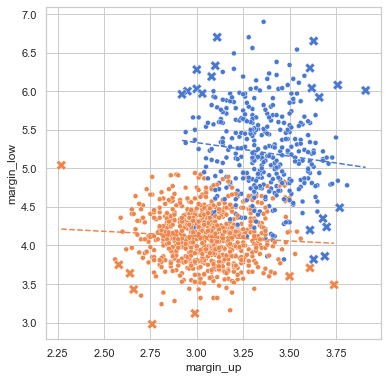

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df, x='margin_up', y='margin_low', hue='is_genuine',
                size='is_unusual_and_influencial', sizes=[25, 100],
                style='is_unusual_and_influencial', markers=['o', 'X'],
                ax=ax)


df_extrema = df.loc[df.groupby('is_genuine')['margin_up'].agg(
    ['idxmin','idxmax']
).to_numpy().reshape(-1)]

sns.lineplot(
    data=df_extrema, x='margin_up', y='fitted',
    hue='is_genuine', linestyle='--', ax=ax
)

ax.get_legend().remove()

plt.show()

On réentraine le modèle sans ces outliers.

In [65]:
not_outliers = df.index[df['is_unusual_and_influencial'] == 0]

In [66]:
train_set_no_outliers = train_set_imputation.loc[not_outliers]

In [67]:
weights = train_set_no_outliers['is_genuine'].map(weight_mapper)

In [68]:
mlr_weighted_interaction_no_outliers = smf.wls('margin_low ~ is_genuine * margin_up',
                                          data=train_set_no_outliers,
                                          weights=weights).fit()

In [69]:
print(mlr_weighted_interaction_no_outliers.summary())

                            WLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.528
Model:                            WLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     420.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.42e-183
Time:                        15:56:01   Log-Likelihood:                -480.54
No. Observations:                1135   AIC:                             969.1
Df Residuals:                    1131   BIC:                             989.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.2300 

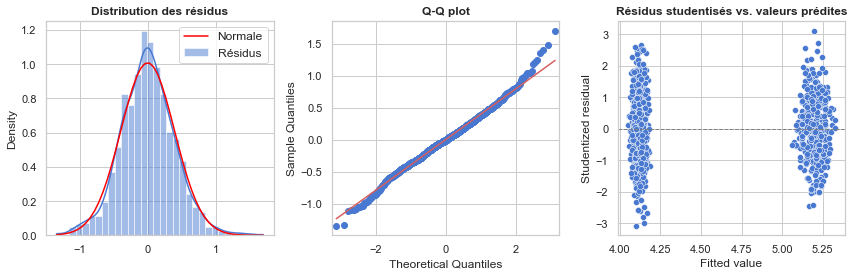

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
check_normality_of_residuals(mlr_weighted_interaction_no_outliers, axes=axes[:2])
plot_studentized_resids_vs_fitted_wls(mlr_weighted_interaction_no_outliers, ax=axes[2])
fig.tight_layout()

## Evaluation des modèles

On évalue la performance des modèles sur le *test set* en utilisant comme métrique la RMSE (racine carrée de l'erreur moyenne au carré).

In [71]:
models = {
    'Régression linéaire simple': slr,
    'Régression pondérée': slr_weighted,
    'Reg. pondérée (sans outliers)': slr_weighted_no_outliers,
    'Reg. multiple': mlr_weighted_sparse,
    'RLM (sans outliers)': mlr_weighted_sparse_no_outliers,
    'RLM avec interaction': mlr_weighted_interaction,
    'RLM avec interaction (sans outliers)': mlr_weighted_interaction_no_outliers
}

In [72]:
res = pd.DataFrame(index=np.arange(len(models)), columns=['Modèle', 'RMSE'])
y = test_set_imputation['margin_low']

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(test_set_imputation)
    rmse = mean_squared_error(y, y_pred, squared=False)
    res.iloc[i] = [name, rmse]

res

,Modèle,RMSE
0,Régression linéaire simple,0.373726
1,Régression pondérée,0.373726
2,Reg. pondérée (sans outliers),0.373711
3,Reg. multiple,0.371219
4,RLM (sans outliers),0.371024
5,RLM avec interaction,0.367984
6,RLM avec interaction (sans outliers),0.368966


<div class="alert alert-block alert-info">
    <b>Note</b><br>
    Comme mentionné au début de ce notebook, à l'exception de <code>is_genuine</code>, les variables ne sont que peu corrélées à <code>margin_low</code>. Il n'est donc pas étonnant que la performance des modèles de régression multiple ne soit pas bien meilleure que celle de la régression linéaire simple.
</div>

# Imputation des données

On utilise le modèle avec le meilleur score (régression avec terme d'interaction) pour imputer les données.

In [73]:
def imputation(df):
    df = df.copy()
    mask = df['margin_low'].isna()
    df.loc[mask, 'margin_low'] = mlr_weighted_interaction.predict(df.loc[mask])
    return df

In [74]:
billets_imputed = imputation(billets)

In [75]:
billets_imputed.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [76]:
billets_imputed.to_csv('./data/billets_imputed.csv', index=False)

# Test KNN

Par curiosité, on s'intéresse au score qu'obtiendrait l'algorithme des k-nearest neighbors (KNN).

In [77]:
def preprocessing_imputation(df):
    df = df.dropna(subset='margin_low')
    X = df.drop(columns='margin_low')
    y = df[['margin_low']]
    return X, y

In [78]:
X_train, y_train = preprocessing_imputation(train_set_imputation)
X_test, y_test = preprocessing_imputation(test_set_imputation)

In [79]:
# on cherche le nombre optimal de voisins avec GridSearchCV
param_grid = {
    'n_neighbors': range(1, 30, 2)
}

In [80]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 30, 2)},
             scoring='neg_root_mean_squared_error')

In [82]:
grid.best_params_

{'n_neighbors': 21}

In [83]:
grid.best_score_

-0.4257905615121418

In [84]:
neighbors = grid.best_estimator_

In [85]:
y_test_pred = neighbors.predict(X_test)

In [86]:
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
rmse

0.374496422267176

La performance du KNN est légèrement inférieure à celle de la régression.